# Predict Future Sales

Final project for "How to win a Data Science Competition"

* https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data
* https://www.coursera.org/learn/competitive-data-science/home/welcome

In [36]:
# Importació de mòduls

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from xgboost import plot_importance

In [47]:
# Importació de dades

train_sales = pd.read_csv('train_sales.csv')
train_eval = pd.read_csv('train_eval.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
# Conjunts d'entrenament i validació

X_train = train_sales.drop('item_cnt', 1)
y_train = train_sales['item_cnt']

X_eval = train_eval.drop('item_cnt', 1)
y_eval = train_eval['item_cnt']

In [39]:
# Entrenament

model = XGBRegressor(n_estimators= 20, max_depth=10, objective='reg:squarederror')
model.fit(X_train, y_train, eval_metric="rmse", eval_set=[(X_train, y_train), (X_eval, y_eval)])

[0]	validation_0-rmse:3.07697	validation_1-rmse:2.5378
[1]	validation_0-rmse:2.86692	validation_1-rmse:2.41125
[2]	validation_0-rmse:2.68271	validation_1-rmse:2.30705
[3]	validation_0-rmse:2.51084	validation_1-rmse:2.22
[4]	validation_0-rmse:2.36144	validation_1-rmse:2.13807
[5]	validation_0-rmse:2.22817	validation_1-rmse:2.07356
[6]	validation_0-rmse:2.11189	validation_1-rmse:2.0196
[7]	validation_0-rmse:2.00153	validation_1-rmse:1.97765
[8]	validation_0-rmse:1.90345	validation_1-rmse:1.94073
[9]	validation_0-rmse:1.82062	validation_1-rmse:1.90736
[10]	validation_0-rmse:1.74547	validation_1-rmse:1.88216
[11]	validation_0-rmse:1.6778	validation_1-rmse:1.86306
[12]	validation_0-rmse:1.61568	validation_1-rmse:1.84903
[13]	validation_0-rmse:1.56184	validation_1-rmse:1.83452
[14]	validation_0-rmse:1.51302	validation_1-rmse:1.82497
[15]	validation_0-rmse:1.46811	validation_1-rmse:1.81573
[16]	validation_0-rmse:1.42363	validation_1-rmse:1.80789
[17]	validation_0-rmse:1.38209	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [41]:
# RMSE del conjunt de validació

y_pred = model.predict(X_eval)
np.sqrt(mean_squared_error(y_pred.clip(0,20), y_eval.clip(0,20)))

0.9513379751828343

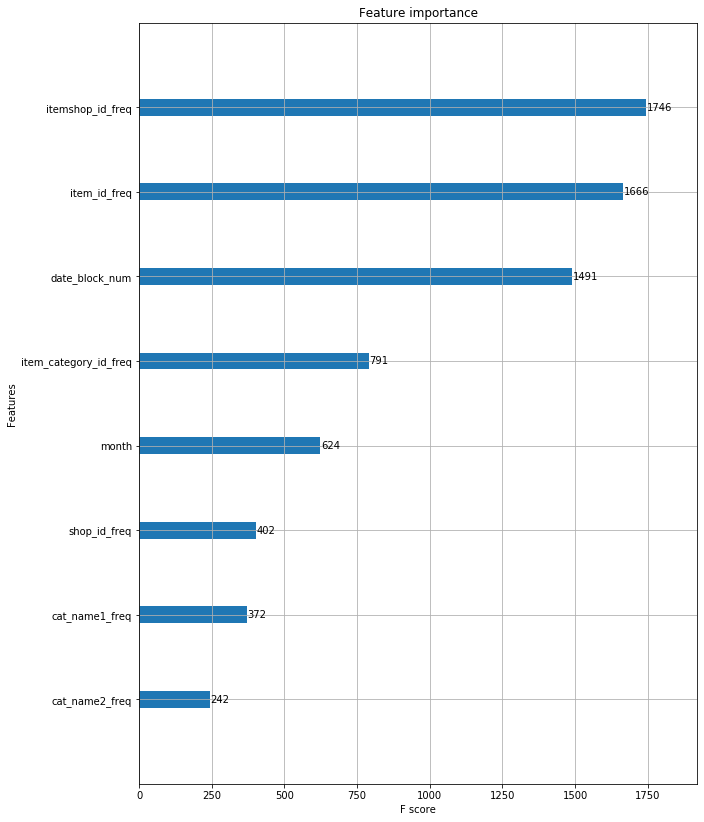

In [42]:
# Importància dels atributs

fig, ax = plt.subplots(1,1,figsize=(10,14))
plot_importance(booster=model, ax=ax)

## Predicció

In [44]:
# Separació d'atributs i etiqueta

X = train.drop('item_cnt', 1)
y = train['item_cnt']

In [45]:
# Entrenament

model = XGBRegressor(max_depth=10, n_estimators= 40, objective='reg:squarederror')\
                    .fit(X, y, eval_metric="rmse", eval_set=[(X,y)])

[0]	validation_0-rmse:3.05419
[1]	validation_0-rmse:2.85044
[2]	validation_0-rmse:2.66649
[3]	validation_0-rmse:2.50573
[4]	validation_0-rmse:2.36146
[5]	validation_0-rmse:2.23562
[6]	validation_0-rmse:2.11902
[7]	validation_0-rmse:2.01444
[8]	validation_0-rmse:1.91752
[9]	validation_0-rmse:1.83169
[10]	validation_0-rmse:1.76113
[11]	validation_0-rmse:1.68975
[12]	validation_0-rmse:1.62746
[13]	validation_0-rmse:1.56681
[14]	validation_0-rmse:1.51399
[15]	validation_0-rmse:1.46639
[16]	validation_0-rmse:1.42467
[17]	validation_0-rmse:1.38923
[18]	validation_0-rmse:1.35596
[19]	validation_0-rmse:1.32372
[20]	validation_0-rmse:1.29929
[21]	validation_0-rmse:1.27251
[22]	validation_0-rmse:1.24757
[23]	validation_0-rmse:1.22467
[24]	validation_0-rmse:1.20299
[25]	validation_0-rmse:1.18304
[26]	validation_0-rmse:1.16288
[27]	validation_0-rmse:1.14642
[28]	validation_0-rmse:1.12847
[29]	validation_0-rmse:1.11451
[30]	validation_0-rmse:1.10269
[31]	validation_0-rmse:1.09197
[32]	validation_0-

In [48]:
# Predicció

y_pred = model.predict(test[X.columns]).clip(0,20)
submission = pd.DataFrame({'ID':test['ID'], 'item_cnt_month': y_pred})
submission.to_csv('submission.csv', index = False)

In [50]:
# RMSE al conjunt d'entrenament

np.sqrt(mean_squared_error(model.predict(train[X.columns]), y))

1.0150034695847288

RMSE al conjunt test (public score): 1.08680